In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
file_path = 'Hospital_OPD_DataSet.csv' # Make sure this file is in the same folder
df = pd.read_csv(file_path)

# Display first few rows to check data
print("Data Loaded Successfully:")
display(df.head())

Data Loaded Successfully:


,Patient_ID,Date,Arrival Time,Registration Start,Registration End,Consultation_Start,Consultation_End,Pharmacy Queue Start,Pharmacy Queue_End,Leave Time,Total Time in Hospital Min,Doctor_Assigned,Department,Day
0,Mo_001,06/10/2025,08:00,08:00,08:03,08:07,08:22,08:24,08:30,08:33,33,Dr. Silva,General OPD,Monday
1,Mo_002,06/10/2025,08:04,08:04,08:08,08:14,08:24,08:30,08:35,08:36,32,Dr. Perera,General OPD,Monday
2,Mo_003,06/10/2025,08:06,08:08,08:12,08:15,08:27,08:35,08:42,08:44,38,Dr. Kumari,General OPD,Monday
3,Mo_004,06/10/2025,08:10,08:12,08:16,08:22,08:35,08:42,08:49,08:51,41,Dr. Silva,General OPD,Monday
4,Mo_005,06/10/2025,08:13,08:16,08:19,08:25,08:35,08:49,08:54,08:56,43,Dr. Perera,General OPD,Monday


Data loaded successfully.

--- Average Times (Minutes) ---
Avg Wait (Registration):    6.94
Avg Service (Registration): 3.56
------------------------------
Avg Wait (Consultation):    30.07
Avg Service (Consultation): 12.45
------------------------------
Avg Wait (Pharmacy):        68.69
Avg Service (Pharmacy):     6.51
Avg Total Time in OPD:      130.16

Saved: analysis_outputs\all_averages_bar.png


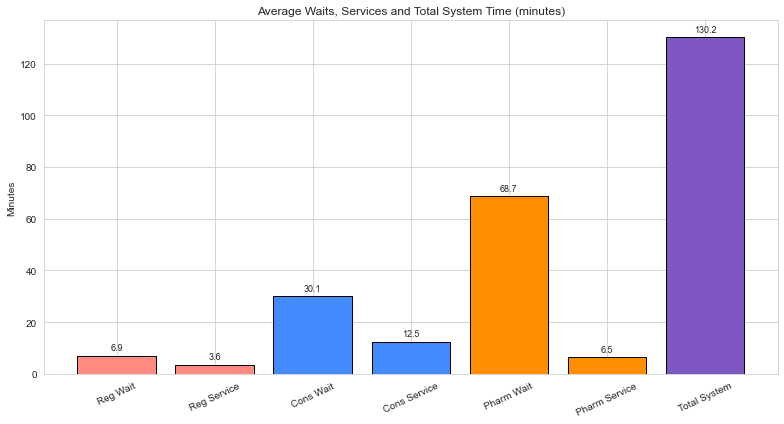

Combined averages chart generated in folder: analysis_outputs


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# File and output paths
FILE_PATH = 'Hospital_OPD_DataSet.csv'
OUT_DIR = 'analysis_outputs'

os.makedirs(OUT_DIR, exist_ok=True)

if not os.path.exists(FILE_PATH):
    raise SystemExit(f"Error: {FILE_PATH} not found in current folder.")

# Load dataset
df = pd.read_csv(FILE_PATH)
print("Data loaded successfully.")

# Columns to convert
time_cols = ['Arrival Time', 'Registration Start', 'Registration End', 
             'Consultation_Start', 'Consultation_End', 
             'Pharmacy Queue Start', 'Pharmacy Queue_End', 'Leave Time']

for col in time_cols:
    df[col] = pd.to_datetime(df[col], format='%H:%M', errors='coerce')

# Compute derived times (minutes)
df['Wait_Registration'] = (df['Registration Start'] - df['Arrival Time']).dt.total_seconds() / 60
df['Service_Registration'] = (df['Registration End'] - df['Registration Start']).dt.total_seconds() / 60
df['Wait_Consultation'] = (df['Consultation_Start'] - df['Registration End']).dt.total_seconds() / 60
df['Service_Consultation'] = (df['Consultation_End'] - df['Consultation_Start']).dt.total_seconds() / 60
df['Wait_Pharmacy'] = (df['Pharmacy Queue Start'] - df['Consultation_End']).dt.total_seconds() / 60
df['Service_Pharmacy'] = (df['Pharmacy Queue_End'] - df['Pharmacy Queue Start']).dt.total_seconds() / 60
df['Total_System_Time'] = (df['Leave Time'] - df['Arrival Time']).dt.total_seconds() / 60

# Compute averages
wait_means = df[['Wait_Registration', 'Wait_Consultation', 'Wait_Pharmacy']].mean()
service_means = df[['Service_Registration', 'Service_Consultation', 'Service_Pharmacy']].mean()
total_mean = df['Total_System_Time'].mean()

# Print averages to terminal
print('\n--- Average Times (Minutes) ---')
print(f"Avg Wait (Registration):    {wait_means['Wait_Registration']:.2f}")
print(f"Avg Service (Registration): {service_means['Service_Registration']:.2f}")
print('-' * 30)
print(f"Avg Wait (Consultation):    {wait_means['Wait_Consultation']:.2f}")
print(f"Avg Service (Consultation): {service_means['Service_Consultation']:.2f}")
print('-' * 30)
print(f"Avg Wait (Pharmacy):        {wait_means['Wait_Pharmacy']:.2f}")
print(f"Avg Service (Pharmacy):     {service_means['Service_Pharmacy']:.2f}")
print('=' * 30)
print(f"Avg Total Time in OPD:      {total_mean:.2f}\n")

# Single combined bar chart of all averages
labels = [
    'Reg Wait', 'Reg Service',
    'Cons Wait', 'Cons Service',
    'Pharm Wait', 'Pharm Service',
    'Total System'
]

values = [
    wait_means.get('Wait_Registration', 0), service_means.get('Service_Registration', 0),
    wait_means.get('Wait_Consultation', 0), service_means.get('Service_Consultation', 0),
    wait_means.get('Wait_Pharmacy', 0), service_means.get('Service_Pharmacy', 0),
    total_mean
]

colors = ['#FF8A80', '#FF8A80', '#448AFF', '#448AFF', '#FF8F00', '#FF8F00', '#7E57C2']

plt.figure(figsize=(11, 6))
bars = plt.bar(labels, values, color=colors, edgecolor='black')
plt.title('Average Waits, Services and Total System Time (minutes)')
plt.ylabel('Minutes')
plt.xticks(rotation=25)

# Label bars with values
for bar, val in zip(bars, values):
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, h + max(values) * 0.01, f"{val:.1f}", ha='center', va='bottom', fontsize=9)

out_all = os.path.join(OUT_DIR, 'all_averages_bar.png')
plt.tight_layout()
plt.savefig(out_all)
print(f"Saved: {out_all}")
plt.show()




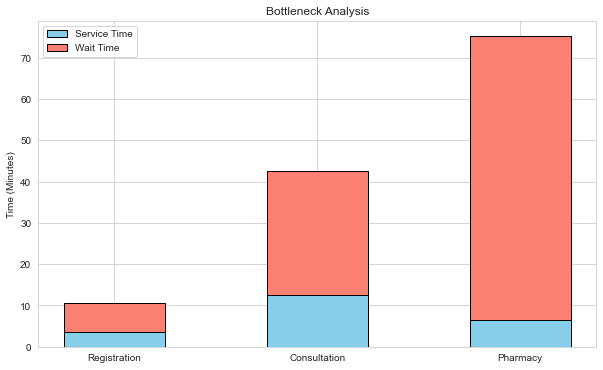

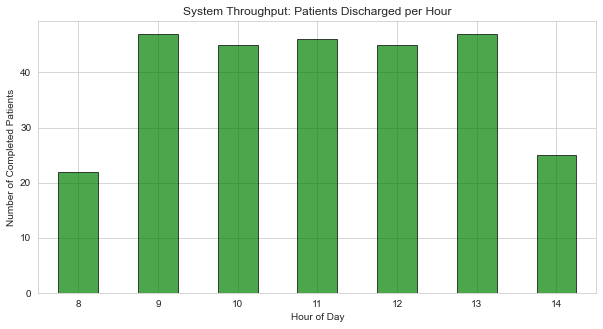

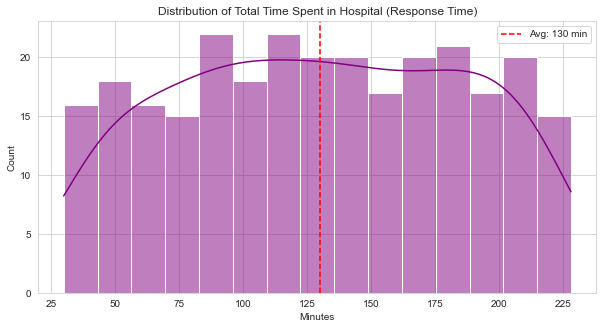

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set plot style for better visuals
sns.set_style("whitegrid")

# Ensure time columns are datetime objects (Safeguard)
df['Leave Time'] = pd.to_datetime(df['Leave Time'], format='%H:%M')
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'], format='%H:%M')

# BOTTLENECK ANALYSIS: Stacked Bar Chart (Wait vs Service)

stages = ['Registration', 'Consultation', 'Pharmacy']

# Ensure these columns exist from previous steps
avg_wait = [
    df['Wait_Registration'].mean(), 
    df['Wait_Consultation'].mean(), 
    df['Wait_Pharmacy'].mean()
]
avg_service = [
    df['Service_Registration'].mean(), 
    df['Service_Consultation'].mean(), 
    df['Service_Pharmacy'].mean()
]

plt.figure(figsize=(10, 6))
x = range(len(stages))

# Plot Service Time (Bottom)
plt.bar(x, avg_service, width=0.5, label='Service Time', color='skyblue', edgecolor='black')
# Plot Wait Time (Top - Stacked)
plt.bar(x, avg_wait, width=0.5, bottom=avg_service, label='Wait Time', color='salmon', edgecolor='black')

plt.xticks(x, stages)
plt.ylabel('Time (Minutes)')
plt.title('Bottleneck Analysis')
plt.legend()
plt.show()

# THROUGHPUT ANALYSIS: Patients leave from hospital per Hour
df['Leave_Hour'] = df['Leave Time'].dt.hour
throughput = df.groupby('Leave_Hour')['Patient_ID'].count()

plt.figure(figsize=(10, 5))
throughput.plot(kind='bar', color='green', alpha=0.7, edgecolor='black')
plt.title('System Throughput: Patients Discharged per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Completed Patients')
plt.xticks(rotation=0)
plt.show()


# RESPONSE TIME DISTRIBUTION
plt.figure(figsize=(10, 5))
# Uses Total_System_Time calculated in Phase 1
sns.histplot(df['Total_System_Time'], kde=True, color='purple', bins=15)
plt.title('Distribution of Total Time Spent in Hospital (Response Time)')
plt.xlabel('Minutes')
plt.axvline(df['Total_System_Time'].mean(), color='red', linestyle='--', label=f'Avg: {df["Total_System_Time"].mean():.0f} min')
plt.legend()
plt.show()

--- Running Current Scenario (Baseline) ---
Resources: Reg=1, Docs=3, Pharm=1
Result: Avg Time = 92.78 mins

--- Running Optimized Scenario ---
Resources: Reg=1, Docs=3, Pharm=2
Result: Avg Time = 60.97 mins



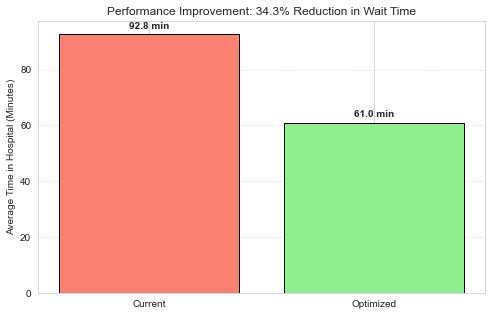

ANALYSIS CONCLUSION:
The baseline simulation (1 Reg, 3 Doc, 1 Pharm) confirms the bottleneck.
Adding 1 pharmacist reduces average time by 34.3%.


In [25]:
import simpy
import random
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SIMULATION CONFIGURATION ---
SIMULATION_TIME = 390 

# Average times derived from your Data Analysis
AVG_ARRIVAL_INTERVAL = 4    # Patients arrive approx every 4 mins
REGISTRATION_TIME = 4       
CONSULTATION_TIME = 13      
PHARMACY_TIME = 7           

# --- PART 2: THE SIMULATION ENGINE ---
class HospitalOPD:
    def __init__(self, env, num_reg, num_doc, num_pharm):
        self.env = env
        self.registration = simpy.Resource(env, num_reg)
        self.doctor = simpy.Resource(env, num_doc)
        self.pharmacy = simpy.Resource(env, num_pharm)

    def register(self, patient):
        yield self.env.timeout(random.expovariate(1.0 / REGISTRATION_TIME))

    def consult(self, patient):
        yield self.env.timeout(random.expovariate(1.0 / CONSULTATION_TIME))

    def buy_medicine(self, patient):
        yield self.env.timeout(random.expovariate(1.0 / PHARMACY_TIME))

def patient_flow(env, name, hospital, wait_times_list):
    # Arrive
    arrival_time = env.now
    
    # Registration
    with hospital.registration.request() as request:
        yield request
        yield env.process(hospital.register(name))
        
    # Consultation
    with hospital.doctor.request() as request:
        yield request
        yield env.process(hospital.consult(name))
        
    # Pharmacy
    with hospital.pharmacy.request() as request:
        yield request
        yield env.process(hospital.buy_medicine(name))
        
    # Leave
    total_time = env.now - arrival_time
    wait_times_list.append(total_time)

def patient_generator(env, hospital, wait_times_list):
    patient_id = 0
    while True:
        yield env.timeout(random.expovariate(1.0 / AVG_ARRIVAL_INTERVAL))
        patient_id += 1
        env.process(patient_flow(env, f'Patient_{patient_id}', hospital, wait_times_list))

# Wrapper function to run a single scenario
def run_hospital_simulation(scenario_name, num_reg, num_doc, num_pharm):
    print(f"--- Running {scenario_name} ---")
    print(f"Resources: Reg={num_reg}, Docs={num_doc}, Pharm={num_pharm}")
    
    env = simpy.Environment()
    wait_times = []
    hospital = HospitalOPD(env, num_reg, num_doc, num_pharm)
    
    env.process(patient_generator(env, hospital, wait_times))
    env.run(until=SIMULATION_TIME)
    
    if len(wait_times) > 0:
        avg_time = statistics.mean(wait_times)
    else:
        avg_time = 0
    print(f"Result: Avg Time = {avg_time:.2f} mins\n")
    return wait_times

# RUN SCENARIOS  ---
# Scenario A: Current Performance
times_current = run_hospital_simulation("Current Scenario (Baseline)", 
                                        num_reg=1,   # Fixed: Matches document
                                        num_doc=3,   # Matches document
                                        num_pharm=1) # Matches document

# Scenario B: Optimized Performance (Proposed Solution)
times_optimized = run_hospital_simulation("Optimized Scenario", 
                                          num_reg=1, 
                                          num_doc=3, 
                                          num_pharm=2) # Increased resource

# VISUALIZATION 

# Prepare data for plotting
results = pd.DataFrame({
    'Scenario': ['Current'] * len(times_current) + ['Optimized'] * len(times_optimized),
    'Total_Time': times_current + times_optimized
})

# Bar Chart Comparison (Average Time)
avg_current = statistics.mean(times_current)
avg_optimized = statistics.mean(times_optimized)
improvement = ((avg_current - avg_optimized) / avg_current) * 100

plt.figure(figsize=(8, 5))
plt.bar(['Current', 'Optimized'], [avg_current, avg_optimized], color=['salmon', 'lightgreen'], edgecolor='black')
plt.ylabel('Average Time in Hospital (Minutes)')
plt.title(f'Performance Improvement: {improvement:.1f}% Reduction in Wait Time')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add labels
for i, v in enumerate([avg_current, avg_optimized]):
    plt.text(i, v + 2, f"{v:.1f} min", ha='center', fontweight='bold')
plt.show()



print("ANALYSIS CONCLUSION:")
print(f"The baseline simulation (1 Reg, 3 Doc, 1 Pharm) confirms the bottleneck.")
print(f"Adding 1 pharmacist reduces average time by {improvement:.1f}%.")